In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

In [4]:
file="../h5_15_jun/h5_merged1.h5"   #"/home/pablo/github/DeepIceLearning/h5_final3/File_307.h5"
data = h5py.File(file,'r')
data.keys()

OSError: Unable to open file (unable to open file: name = '../h5_15_jun/h5_merged1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
data['IC_mult']

<HDF5 dataset "IC_mult": shape (3756, 10, 10, 60, 1), type "<f8">

In [4]:
data["reco_vals"]["true_e"]
x=data["reco_vals"].dtype
#x

In [5]:
sum_charge= np.sum(np.sum(np.sum(data['IC_charge'],axis=1),axis=1),axis=1).flatten()
IC_diff= np.sum(np.sum(np.sum(data['IC_diff'],axis=1),axis=1),axis=1).flatten()

In [6]:
sum_charge.size

3756

In [19]:
#directory="/home/pablo/github/DeepIceLearning/h5_final3"
directory="/home/pablo/github/DeepIceLearning/h5_15_jun"  #h5_final3"  # "h5_no_filter"      #final2 and final3 have the same athimut distribut among double and cascades
it=0
track_azimuth,track_zenith,true_e,classi,track_length,size=np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])
for filename in os.listdir(directory):
    it=it+1
    if filename.endswith(".h5") and it <100000: 
        path=os.path.join(directory, filename)
        File=h5py.File(path,'r')
        #print(path)
        track_azimuth=np.append(track_azimuth,File["reco_vals"]["true_az"])
        track_zenith=np.append(track_zenith,File["reco_vals"]["true_zen"])
        true_e=np.append(true_e,File["reco_vals"]["true_e"])
        classi=np.append(classi,File["reco_vals"]["classification"])
        track_length=np.append(track_length,File["reco_vals"]["track_length"])
        size=np.append(size,File["reco_vals"]["true_e"].size)

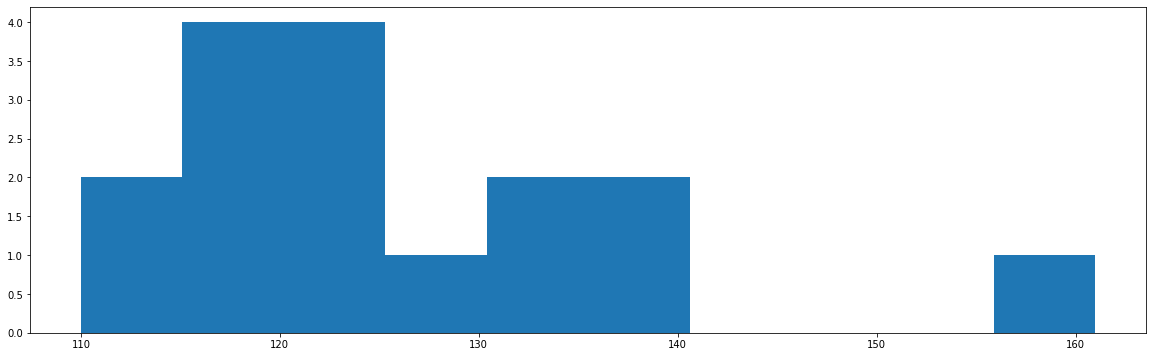

In [20]:
plt.hist(size,10)
plt.show()

In [21]:
np.average(size)

126.5

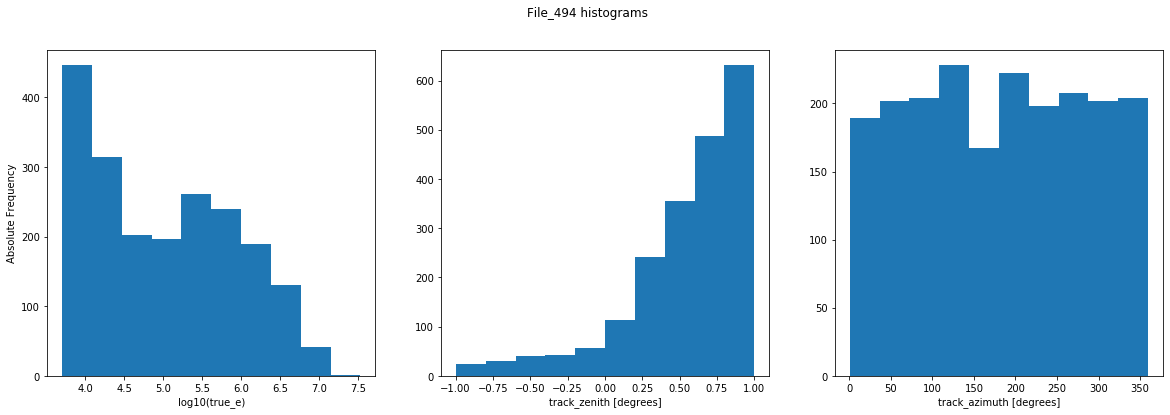

In [22]:
plt.subplot(131)
plt.hist(np.log10(true_e),10)
plt.xlabel('log10(true_e)')
plt.ylabel('Absolute Frequency')

plt.subplot(132)
plt.hist(np.cos(track_zenith),10)
plt.xlabel('track_zenith [degrees]')

plt.subplot(133)
plt.hist(track_azimuth/np.pi*180,10)
plt.xlabel('track_azimuth [degrees]')

plt.suptitle("File_494 histograms")

plt.rcParams['figure.figsize'] = [20, 6]
plt.show()

In [23]:
print("Double bang events:")
print(np.sum(classi==[5]))
print("cascades:")
print(np.sum(classi==[1]))
print("Total number of events")
print(classi.size)

Double bang events:
741
cascades:
1283
Total number of events
2024


In [24]:
np.sum(classi==[5])/np.sum(classi==[1])

0.5775526110678099

In [11]:
classi.size

1008

In [12]:
track_length.size

1008

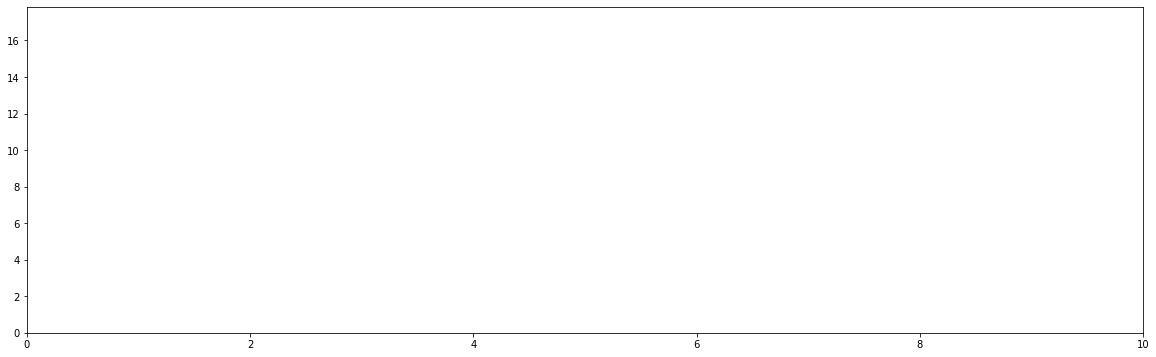

In [13]:
plt.hist(track_length[classi==5],1000)
plt.xlim(0, 10)
plt.show()

In [14]:
a=np.histogram(track_length[classi==5],1000)


In [15]:
db=track_length[classi==5]

In [16]:
f3 = lambda x : 100*np.exp(-x*2)+1
1/f3(0)

0.009900990099009901

In [17]:
db.size/db2.size

NameError: name 'db2' is not defined

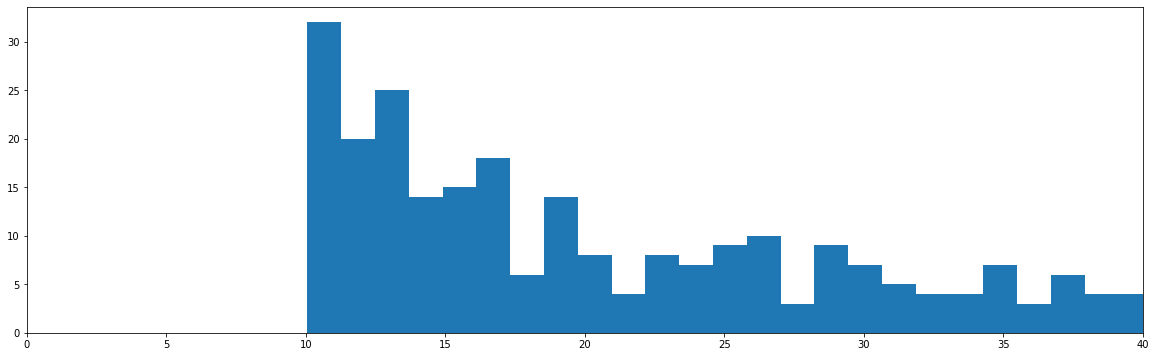

In [18]:
f3 = lambda x : 100*np.exp(-x*1)+1
db2=db[1/f3(db)>(np.random.uniform(0,1,np.size(db)))]
plt.hist(db2,500)
plt.xlim(0, 40)
plt.show()

In [298]:
sum(db2)

34469.7692795313

In [303]:
34469.7*0.9

31022.73

In [304]:
sum(db2)

13964.005685642973

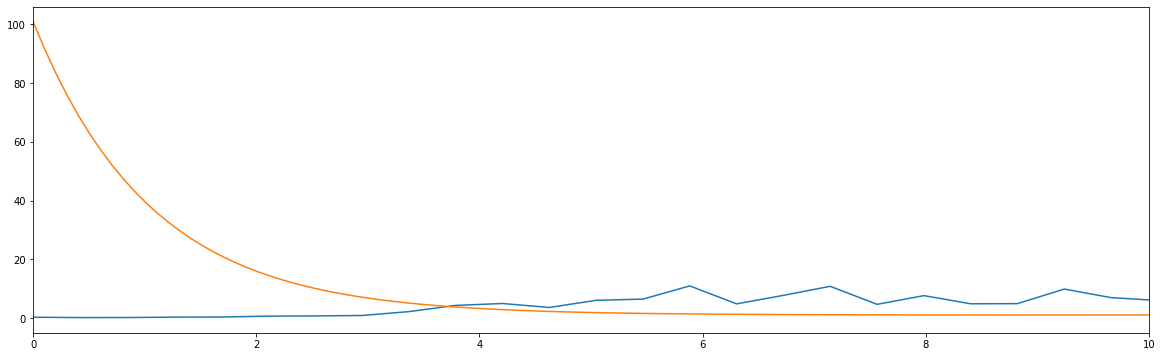

In [355]:
x2=a[1][0:-1]
f3 = lambda x : 100*np.exp(-x*0.95)+1
#plt.plot(x2,a[0])
plt.plot(x2,a[0]/f3(x2))
x=np.linspace(0,10,100)
plt.plot(x,f3(x))
plt.xlim(0, 10)
plt.show()

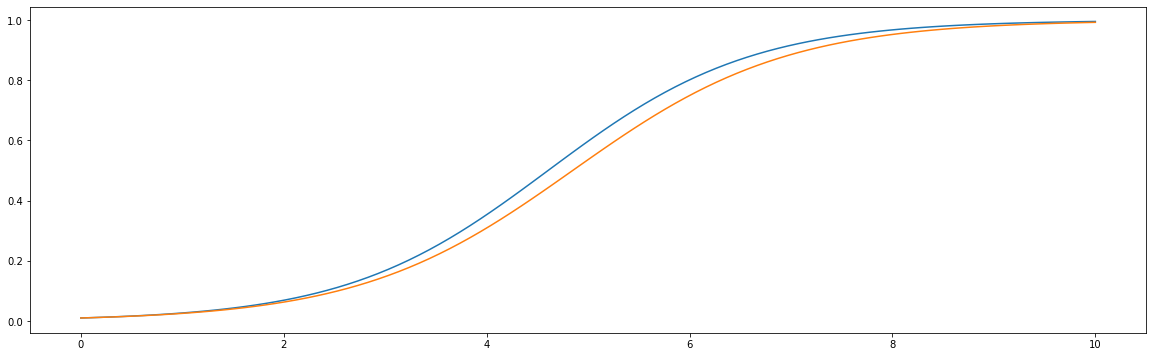

In [354]:
f3 = lambda x : 100*np.exp(-x*1)+1
f4 = lambda x : 100*np.exp(-x*0.95)+1
x=np.linspace(0,10,100)
plt.plot(x,1/f3(x))
plt.plot(x,1/f4(x))

In [100]:
f3(0)

11.0

In [134]:
sum(track_length<5)

2182

In [135]:
sum(track_length>5)

566

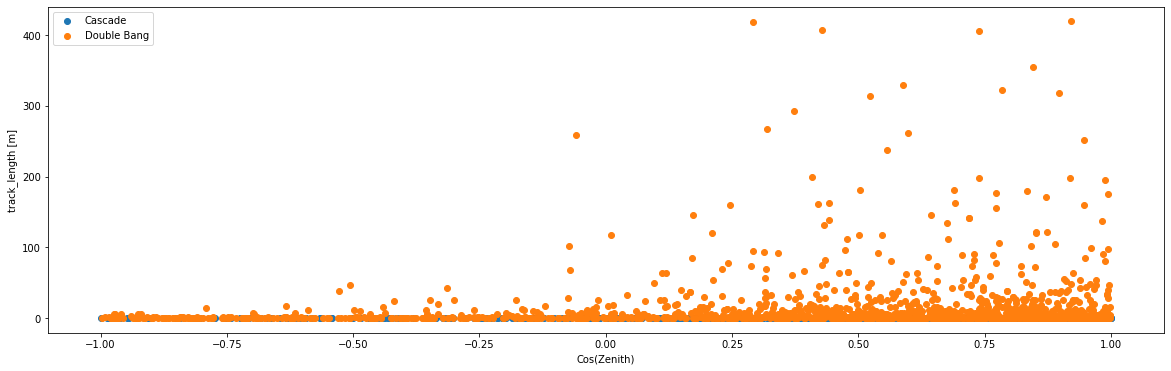

In [127]:
plt.scatter(np.cos(track_zenith[classi==1]),track_length[classi==1],label="Cascade")
plt.scatter(np.cos(track_zenith[classi==5]),track_length[classi==5],label="Double Bang")
plt.ylabel('track_length [m]')
plt.xlabel('Cos(Zenith)')
plt.legend()
plt.show()

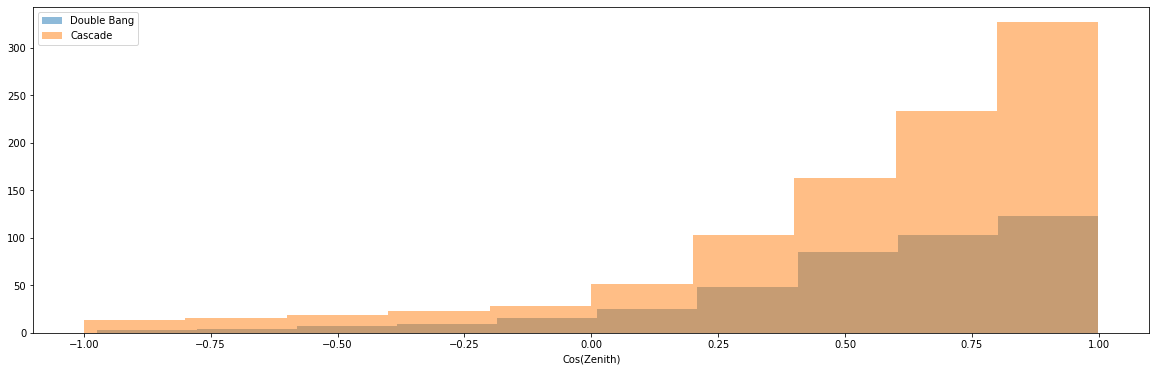

In [95]:
z=track_zenith[classi==5]
t=track_length[classi==5]
plt.hist(np.cos(z[t>5]),alpha = 0.5,label="Double Bang")
plt.hist(np.cos(track_zenith[classi==1]),alpha = 0.5,label="Cascade")
plt.xlabel('Cos(Zenith)')
plt.legend()
plt.show()

In [50]:
z=track_zenith[classi==5]
t=track_length[classi==5]
a=np.histogram(np.cos(z[t>5]))
b=np.histogram(np.cos(track_zenith[classi==1]))
y=b[0]/a[0]

In [51]:
from scipy import optimize

In [52]:
def f(x,a,b,c):
    return a*np.exp(x*b)+c

array([-1.12803867e+03,  1.51055102e-04,  1.12921227e+03])

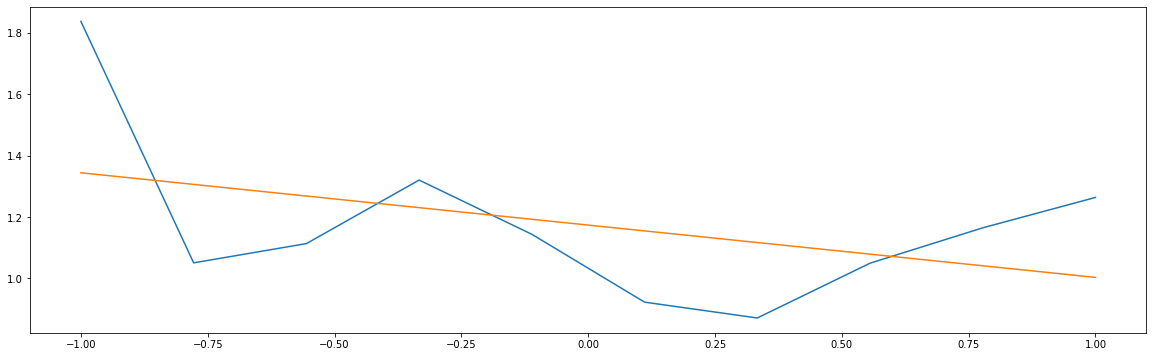

In [53]:
x=np.linspace(-1,1,10)
plt.plot(x,y)
par,mat = optimize.curve_fit(f,x,y)
plt.plot(x,f(x,*par))
par

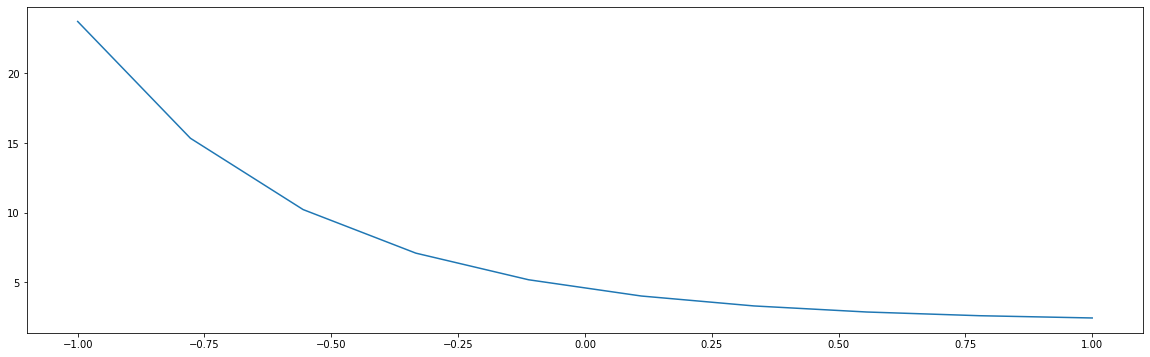

In [21]:
plt.plot(x,f(x, 2.34136874, -2.21843066,  2.19760958))

In [22]:
plt.scatter(np.cos(cascades_zenith),1/f2(np.cos(cascades_zenith)))

NameError: name 'cascades_zenith' is not defined

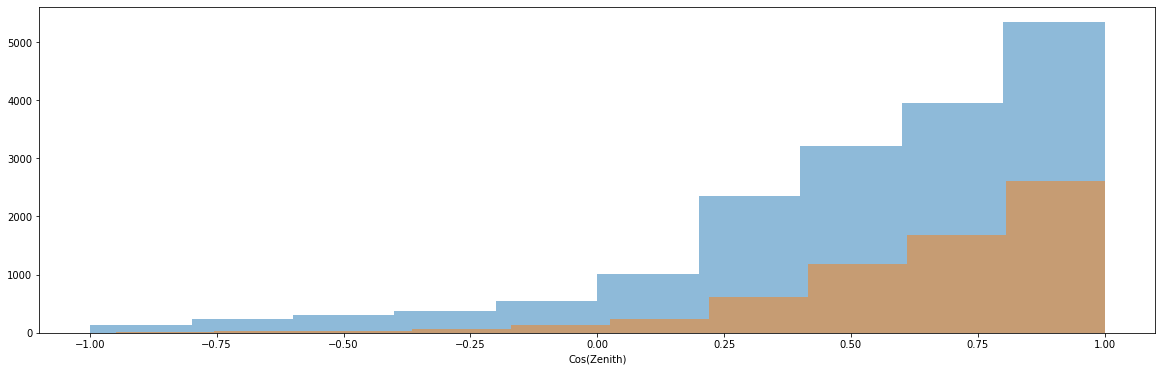

In [23]:
#cascades_cos_zenith=np.cos(track_zenith[classi==1])
cascades_zenith=track_zenith[classi==1]

plt.hist(np.cos(z[t>5]),alpha = 0.5)
f2 = lambda x : (2.34136874*np.exp(-x*2.21843066)) + 2.19760958
condition= (1/f2(np.cos(cascades_zenith)))>(np.random.uniform(0,1,cascades_zenith.size))
#np.logical_and(np.random.uniform(0,1,cascades_zenith.size)<0.34,(cascades_zenith*np.random.uniform(0,1,cascades_zenith.size))>-0.1)
plt.xlabel('Cos(Zenith)')
plt.hist(np.cos(cascades_zenith[ condition ]),alpha = 0.5,bins=10)
plt.show()


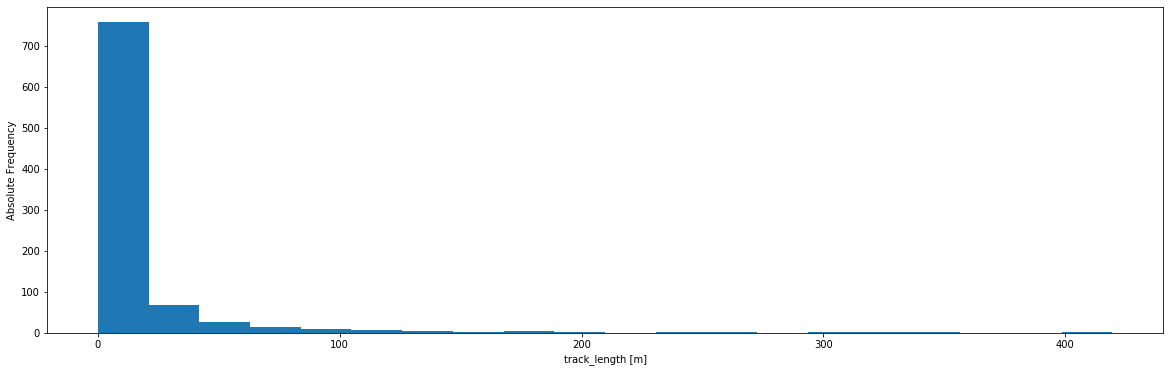

In [64]:
track_length=track_length[track_length>0]
plt.hist(track_length,20)
plt.xlabel('track_length [m]')
plt.ylabel('Absolute Frequency')
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [17]:
track_length=track_length[track_length!=0]
np.min(track_length)

9.370834623473878e-06

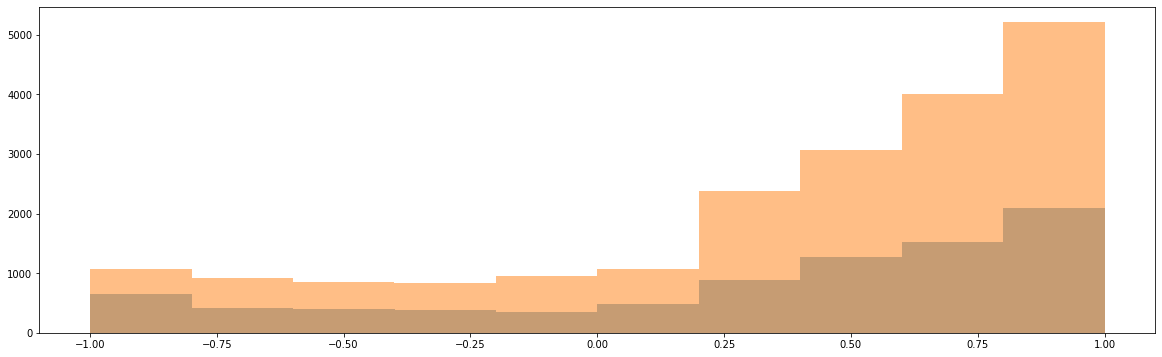

In [47]:
plt.hist(np.cos(track_zenith[classi==1]),alpha = 0.5)
plt.hist(np.cos(track_zenith[classi==5]),alpha = 0.5)
plt.rcParams['figure.figsize'] = [10, 3]
plt.show()